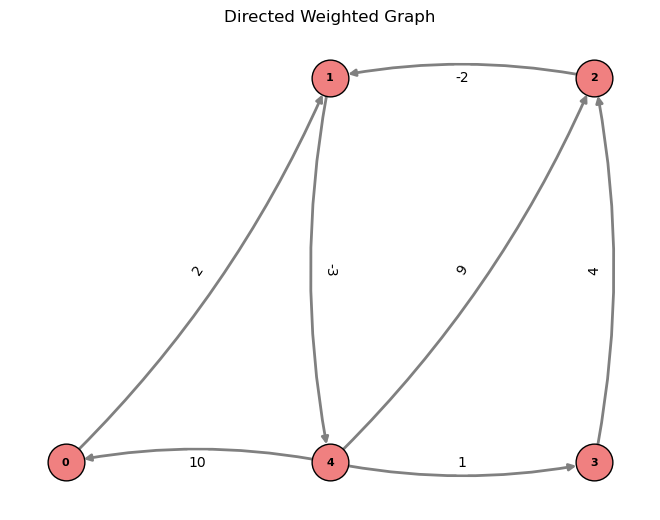

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

edges_directed = [(0, 1, {'cost': 2}),
                  (1, 4, {'cost': -3}),
                  (2, 1, {'cost': -2}),
                  (3, 2, {'cost': 4}),
                  (4, 0, {'cost': 10}), (4, 2, {'cost': 9}), (4, 3, {'cost': 1})]

G_directed = nx.DiGraph(edges_directed)

# Define the fixed positions for nodes
fixed_positions = {0: (0, 0), 1: (1, 1), 4: (1, 0), 2: (2, 1), 3: (2, 0)}


# Draw the graph with fixed positions
nx.draw(G_directed, fixed_positions, with_labels=True, node_size=700, node_color="lightcoral",
        font_size=8, font_color="black", font_weight="bold", edge_color="gray", width=2,
        connectionstyle="arc3,rad=0.1", edgecolors="black")

labels_directed = nx.get_edge_attributes(G_directed, 'cost')
nx.draw_networkx_edge_labels(G_directed, fixed_positions, edge_labels=labels_directed)

plt.title("Directed Weighted Graph")
plt.show()


In [4]:
def live_demo(dist,i,j,k):
    if i == 4 and j == 1:
        print("k =", k , "| i =", i, "| j =", j)
        print(f"{dist[i][j]} > {dist[i][k]} + {dist[k][j]}\n")

    if i == 3 and j == 1:
        print("k =", k , "| i =", i, "| j =", j)
        print(f"{dist[i][j]} > {dist[i][k]} + {dist[k][j]}\n")

def floyd_warshall(graph):
    num_vertices = graph.number_of_nodes()
    dist = [[float('inf')] * num_vertices for _ in range(num_vertices)]

    for edge in graph.edges(data=True):
        u, v, weight = edge[0], edge[1], edge[2]['cost']
        dist[u][v] = weight

    for v in range(num_vertices):
        dist[v][v] = 0

    #print the initial matrix
    print("k = initial")
    print(np.array(dist), "\n")

    for k in range(num_vertices):
        for i in range(num_vertices):
            for j in range(num_vertices):
                if dist[i][j] > dist[i][k] + dist[k][j]:
                    live_demo(dist,i,j,k) # print for live demo
                    dist[i][j] = dist[i][k] + dist[k][j]
        print("k =", k)
        print(np.array(dist), "\n")

    return dist

dist_matrix = floyd_warshall(G_directed)


k = initial
[[ 0.  2. inf inf inf]
 [inf  0. inf inf -3.]
 [inf -2.  0. inf inf]
 [inf inf  4.  0. inf]
 [10. inf  9.  1.  0.]] 

k = 0 | i = 4 | j = 1
inf > 10 + 2

k = 0
[[ 0.  2. inf inf inf]
 [inf  0. inf inf -3.]
 [inf -2.  0. inf inf]
 [inf inf  4.  0. inf]
 [10. 12.  9.  1.  0.]] 

k = 1
[[ 0.  2. inf inf -1.]
 [inf  0. inf inf -3.]
 [inf -2.  0. inf -5.]
 [inf inf  4.  0. inf]
 [10. 12.  9.  1.  0.]] 

k = 2 | i = 3 | j = 1
inf > 4 + -2

k = 2 | i = 4 | j = 1
12 > 9 + -2

k = 2
[[ 0.  2. inf inf -1.]
 [inf  0. inf inf -3.]
 [inf -2.  0. inf -5.]
 [inf  2.  4.  0. -1.]
 [10.  7.  9.  1.  0.]] 

k = 3 | i = 4 | j = 1
7 > 1 + 2

k = 3
[[ 0.  2. inf inf -1.]
 [inf  0. inf inf -3.]
 [inf -2.  0. inf -5.]
 [inf  2.  4.  0. -1.]
 [10.  3.  5.  1.  0.]] 

k = 4
[[ 0  2  4  0 -1]
 [ 7  0  2 -2 -3]
 [ 5 -2  0 -4 -5]
 [ 9  2  4  0 -1]
 [10  3  5  1  0]] 



# Floyd-Warshall-Algorithm with Path reconstruction 

In [6]:
def live_demo(prev,i,j,k):
    if i == 4:
        print("k =", k , "| i =", i, "| j =", j)
        print(f"{prev[i][j]} wird zu {prev[k][j]}\n")


def floyd_warshall_with_path_reconstruction(graph):
    num_vertices = graph.number_of_nodes()
    dist = [[float('inf')] * num_vertices for _ in range(num_vertices)]
    prev = [[None] * num_vertices for _ in range(num_vertices)]

    for edge in graph.edges(data=True):
        u, v, weight = edge[0], edge[1], edge[2]['cost']
        dist[u][v] = weight
        prev[u][v] = u

    for v in range(num_vertices):
        dist[v][v] = 0
        prev[v][v] = v

    for k in range(num_vertices):
        for i in range(num_vertices):
            for j in range(num_vertices):
                if dist[i][j] > dist[i][k] + dist[k][j]:
                    dist[i][j] = dist[i][k] + dist[k][j]
                    live_demo(prev,i,j,k) # print for live demo
                    prev[i][j] = prev[k][j]

        print("k =", k)
        print(np.array(prev), "\n")
        
    return dist, prev

def find_path(prev, u, v):
    if prev[u][v] is None:
        return []

    path = [v]
    while u != v:
        v = prev[u][v]
        path.insert(0, v)

    return path

# Create a directed weighted graph
edges_directed = [(0, 1, {'cost': 2}),
                  (1, 4, {'cost': -3}),
                  (2, 1, {'cost': -2}),
                  (3, 2, {'cost': 4}),
                  (4, 0, {'cost': 10}), (4, 2, {'cost': 9}), (4, 3, {'cost': 1})]

G_directed = nx.DiGraph(edges_directed)

# Call the Floyd-Warshall algorithm with path reconstruction
min_distances, previous_vertices = floyd_warshall_with_path_reconstruction(G_directed)

# Example usage of the find_path function
start_vertex = 4
end_vertex = 1
shortest_path = find_path(previous_vertices, start_vertex, end_vertex)

print("\nMinimum Distances:")
for row in min_distances:
    print(row)

print("\nPrevious Vertices:")
for row in previous_vertices:
    print(row)

print(f"\nShortest Path from {start_vertex} to {end_vertex}: {shortest_path}")


k = 0 | i = 4 | j = 1
None wird zu 0

k = 0
[[0 0 None None None]
 [None 1 None None 1]
 [None 2 2 None None]
 [None None 3 3 None]
 [4 0 4 4 4]] 

k = 1
[[0 0 None None 1]
 [None 1 None None 1]
 [None 2 2 None 1]
 [None None 3 3 None]
 [4 0 4 4 4]] 

k = 2 | i = 4 | j = 1
0 wird zu 2

k = 2
[[0 0 None None 1]
 [None 1 None None 1]
 [None 2 2 None 1]
 [None 2 3 3 1]
 [4 2 4 4 4]] 

k = 3 | i = 4 | j = 1
2 wird zu 2

k = 3 | i = 4 | j = 2
4 wird zu 3

k = 3
[[0 0 None None 1]
 [None 1 None None 1]
 [None 2 2 None 1]
 [None 2 3 3 1]
 [4 2 3 4 4]] 

k = 4
[[0 0 3 4 1]
 [4 1 3 4 1]
 [4 2 2 4 1]
 [4 2 3 3 1]
 [4 2 3 4 4]] 


Minimum Distances:
[0, 2, 4, 0, -1]
[7, 0, 2, -2, -3]
[5, -2, 0, -4, -5]
[9, 2, 4, 0, -1]
[10, 3, 5, 1, 0]

Previous Vertices:
[0, 0, 3, 4, 1]
[4, 1, 3, 4, 1]
[4, 2, 2, 4, 1]
[4, 2, 3, 3, 1]
[4, 2, 3, 4, 4]

Shortest Path from 4 to 1: [4, 3, 2, 1]


# Negative Cycle

k = initial
[[ 0. -1. inf]
 [inf  0. -2.]
 [-3. inf  0.]] 

k = 0
[[ 0. -1. inf]
 [inf  0. -2.]
 [-3. -4.  0.]] 

k = 1
[[ 0. -1. -3.]
 [inf  0. -2.]
 [-3. -4. -6.]] 

k = 2
[[ -6  -7  -9]
 [ -5  -6  -8]
 [ -9 -10 -12]] 

Negative cycle detected!


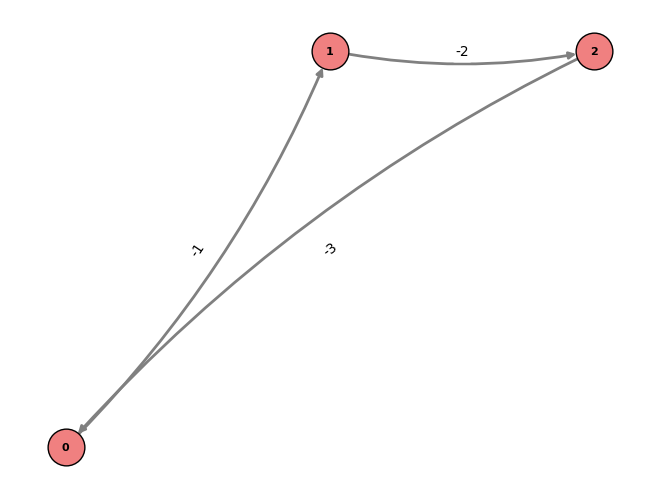

In [29]:
import networkx as nx

def negative_cycle_detection(graph):
    n_nodes = len(graph)
    dis = floyd_warshall(graph)
    
    # Check for negative cycles
    for i in range(n_nodes):
        if dis[i][i] < 0:
            print("Negative cycle detected!")
            return

    print("No negative cycle detected.")

edges_with_negative_cycle = [(0, 1, {'cost': -1}),
                              (1, 2, {'cost': -2}),
                              (2, 0, {'cost': -3})]



G_with_negative_cycle = nx.DiGraph(edges_with_negative_cycle)

labels_with_negative_cycle = nx.get_edge_attributes(G_with_negative_cycle, 'cost')

nx.draw(G_with_negative_cycle, fixed_positions, with_labels=True, node_size=700, node_color="lightcoral",
        font_size=8, font_color="black", font_weight="bold", edge_color="gray", width=2,
        connectionstyle="arc3,rad=0.1", edgecolors="black")

nx.draw_networkx_edge_labels(G_with_negative_cycle, fixed_positions, edge_labels=labels_with_negative_cycle)

negative_cycle_detection(G_with_negative_cycle)

In [30]:
# check for negative cycle of G_directed

negative_cycle_detection(G_directed)

k = initial
[[ 0.  2. inf inf inf]
 [inf  0. inf inf -3.]
 [inf -2.  0. inf inf]
 [inf inf  4.  0. inf]
 [10. inf  9.  1.  0.]] 

k = 0 | i = 4 | j = 1
inf > 10 + 2

k = 0
[[ 0.  2. inf inf inf]
 [inf  0. inf inf -3.]
 [inf -2.  0. inf inf]
 [inf inf  4.  0. inf]
 [10. 12.  9.  1.  0.]] 

k = 1
[[ 0.  2. inf inf -1.]
 [inf  0. inf inf -3.]
 [inf -2.  0. inf -5.]
 [inf inf  4.  0. inf]
 [10. 12.  9.  1.  0.]] 

k = 2 | i = 3 | j = 1
inf > 4 + -2

k = 2 | i = 4 | j = 1
12 > 9 + -2

k = 2
[[ 0.  2. inf inf -1.]
 [inf  0. inf inf -3.]
 [inf -2.  0. inf -5.]
 [inf  2.  4.  0. -1.]
 [10.  7.  9.  1.  0.]] 

k = 3 | i = 4 | j = 1
7 > 1 + 2

k = 3
[[ 0.  2. inf inf -1.]
 [inf  0. inf inf -3.]
 [inf -2.  0. inf -5.]
 [inf  2.  4.  0. -1.]
 [10.  3.  5.  1.  0.]] 

k = 4
[[ 0  2  4  0 -1]
 [ 7  0  2 -2 -3]
 [ 5 -2  0 -4 -5]
 [ 9  2  4  0 -1]
 [10  3  5  1  0]] 

No negative cycle detected.
